# <font color='blue'>SME0241 - Introdução à Modelagem Matemática</font>

## Segundo Trabalho Entregável 05/12/2023

## Prof. Luis Gustavo Nonato  

ICMC-USP

----

## <font color='blue'> Instruções para o Trabalho Entregável 2</font>
<font color='blue'> Os seguintes passos devem ser seguidos para realizar e entregar do segundo trabalho:

1. Baixe e renomeie o notebook `SME241_trabalho_2.ipynb` com seu nome e número USP
2. Uma vez que tenha concluído o trablaho, faça upload do notebook (renomeado) no diretório `Entrega dos Trabalhos/Trabalho 2`

Em todas as questões abaixo você precisa marcar a alternariva correta e também incluir o código Python que calcula a resposta da questão. Para marcar a alternativa que julgue correta, inclua um sinal (X) na frente da mesma. Por exemplo:

a) 123<br>
b) 234 (X)<br>
c) 345<br>
d) 456

</font>

<font color='red'> Não esqueça de renomear o arquivo com seu nome e número USP antes de fazer upload no Drive. <br><br>Por exemplo: <br><br> **Gustavo_Nonato_3223813.ipynb** <br><br> Insira também seu nome e número USP na célula abaixo.</font>

---

**Nome**: Gabriel Gomes Tavares

**No USP**: 15111742

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Questão 1: (5 pontos)
A função abaixo carrega o arquivo ``qualidade_ar_dia.csv``(enviado por email juntamente com o notebook) e retorna uma série com medidas diárias do número de particulas no ar em um ponto da cidade de São Paulo no período de 1 ano.

In [39]:
def read_particulas():
    qar = pd.read_csv('qualidade_ar_dia.csv')
    q = qar['Particulas Inalaveis'].values
    return(q)

#### 1.1) (0.5 ponto) 
Faça o gráfico do número de partículas utilizando como discretização no eixo $x$ pontos igualmente espaçados no intervalo $[0,2\pi]$.

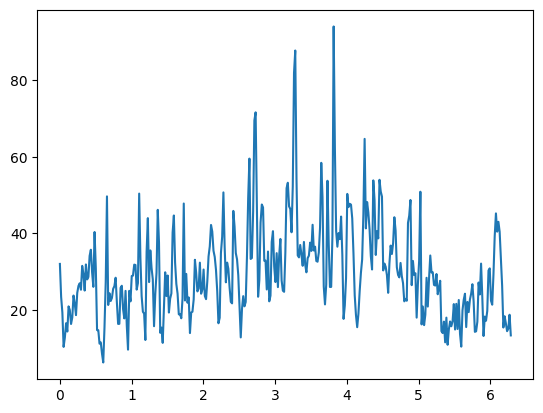

In [40]:
 # Solução
x = np.linspace(0, 2*np.pi, read_particulas().size)
y = read_particulas()

plt.plot(x,y)

#### 1.2) (3 pontos)
Considere a função 

$$
f(t)=a_0+a_1\cos(t)+a_2\sin(t)+a_3\cos(2t)+a_4\sin(2t)
$$

como modelo para a distribuição das partículas dadas no exercício anterior. Encontre os valores de $a_0,a_1,a_2,a_3$ e $a_4$ de modo a minimizar $\sum_i\|f(t_i)-Q(t_i)\|$, onde $Q(t_i)$ é o número de partículas no ponto $t_i\in [0,2\pi]$. 

Qual o erro médio quadrático da aproximação gerada?

a) 300.1<br>
b) 200.9<br>
c) 110.6(x)<br>
d) 90.6

In [46]:
# Dados fornecidos
t_i = np.linspace(0, 2*np.pi, len(read_particulas()))
Q_t_i = read_particulas()

# Matriz do sistema
A = np.column_stack([np.ones_like(t_i), np.cos(t_i), np.sin(t_i), np.cos(2*t_i), np.sin(2*t_i)])

# Solução usando mínimos quadrados
coeficientes, _, _, _ = lstsq(A, Q_t_i, rcond=None)

# Valores otimizados para os parâmetros
a_0, a_1, a_2, a_3, a_4 = coeficientes

# Aproximação da função
f_t_i = a_0 + a_1 * np.cos(t_i) + a_2 * np.sin(t_i) + a_3 * np.cos(2*t_i) + a_4 * np.sin(2*t_i)

# Erro médio quadrático da aproximação
erro = np.mean((f_t_i - Q_t_i)**2)

# Imprimir os valores otimizados e o erro médio quadrático
print(f'a0: {a_0}')
print(f'a1: {a_1}')
print(f'a2: {a_2}')
print(f'a3: {a_3}')
print(f'a4: {a_4}')
print(f'Erro Médio Quadrático: {erro}')

a0: 29.85174778297243
a1: -8.48851976756184
a2: -2.3992082585541565
a3: 0.8178080811799449
a4: 2.752463364476059
Erro Médio Quadrático: 110.63609500425942


#### 1.3) (1.5 pontos)
Faça o gráfico do número de particulas juntamente com o gráfico do modelo encontrado na questão 1.2) acima.

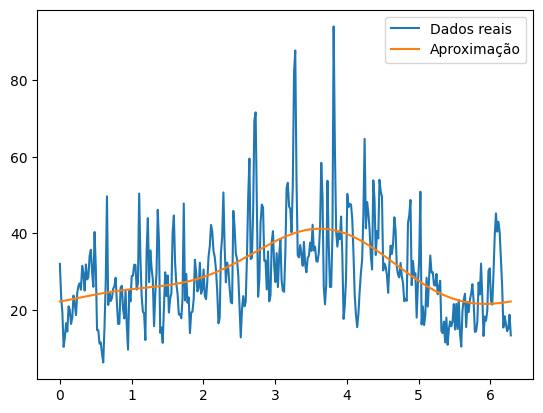

In [47]:
# Solução

# Plotar os dados e a aproximação
plt.plot(t_i, Q_t_i, label='Dados reais')
plt.plot(t_i, f_t_i, label='Aproximação')
plt.legend()
plt.show()


### Questão 2) (5 pontos)
Considere a função $f(x,y)=x^2+16y^2+x$. 

#### 2.1) (1 ponto)
Escreva um código para desenhar as curvas de nível 2, 4, 6 e 8 da função $f(x,y)$ acima.

In [ ]:
# Solução



#### 2.2) (2.5 pontos)
Encontre o ponto onde a curva $xy=1$ é tangente a uma das curvas de nível de $f(x,y)$? Utilize como chute inicial o ponto $x_0=[2,1,1]$. O ponto encontrado é:

a) [1.88,0.53]<br>
b) [2.11,0.67] <br>
c) [-2.53,0.5]<br>
d) [-2,-1]

In [ ]:
# Solucao

#### 2.3) (1.5 ponto)
Faça o gráfico da curva curva $xy=1$ e da curva de nível de $f(x,y)$ que é tangente a ela calculada no exercício anterior, destacando o ponto de tangência. O valor da curva de nível é:

a) 7.38 <br>
b) 8.10 <br>
c) 9.94 <br>
d) 10.51

In [ ]:
#Solucao